In [1]:
# !pip install wordcloud

In [3]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

### Word cloud 
* A word cloud (also known as a tag cloud) is a visual representation of words. Cloud creators are used to highlight popular words and phrases based on frequency and relevance. They provide you with quick and simple visual insights that can lead to more in-depth analyses.

In [4]:
df = pd.read_csv("twitter_disaster_tweet_preprocess", index_col=0)

In [5]:
df.head()

,keyword,location,text,target,emoji_count,hashtags,mentions,tokenized_text,clean,clean_lemma
id,,,,,,,,,,
1,NaN,NaN,our deeds are the reason of this may allah for...,1,0,"(' earthquake', 1)",[],"['our', 'deeds', 'are', 'the', 'reason', 'of',...","['deeds', 'reason', 'may', 'allah', 'forgive',...","['deed', 'reason', 'may', 'allah', 'forgive', ..."
4,NaN,NaN,forest fire near la ronge sask canada,1,0,"('', 0)",[],"['forest', 'fire', 'near', 'la', 'ronge', 'sas...","['forest', 'fire', 'near', 'la', 'ronge', 'sas...","['forest', 'fire', 'near', 'la', 'ronge', 'sas..."
5,NaN,NaN,all residents asked to shelter in place are be...,1,0,"('', 0)",[],"['all', 'residents', 'asked', 'to', 'shelter',...","['residents', 'asked', 'shelter', 'place', 'no...","['resident', 'asked', 'shelter', 'place', 'not..."
6,NaN,NaN,people receive evacuation orders in california,1,0,"(' wildfires', 1)",[],"['', 'people', 'receive', 'evacuation', 'order...","['', 'people', 'receive', 'evacuation', 'order...","['', 'people', 'receive', 'evacuation', 'order..."
7,NaN,NaN,just got sent this photo from ruby as smoke fr...,1,0,"(' alaska, wildfires', 2)",[],"['just', 'got', 'sent', 'this', 'photo', 'from...","['got', 'sent', 'photo', 'ruby', 'smoke', 'pou...","['got', 'sent', 'photo', 'ruby', 'smoke', 'pou..."


In [6]:
?WordCloud

### Testing one tweet

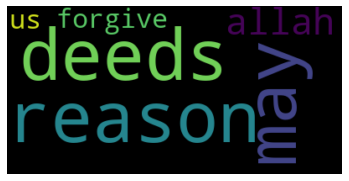

In [10]:
# Start with one review:
text = df['text'].iloc[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Updating Styles

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color=--------------------------).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

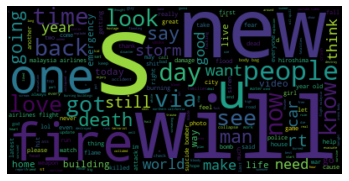

In [11]:
# Start with one review:
text = " ".join(tweet for tweet in df.text)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
# Save the image in the img folder:
wordcloud.to_file("wordcloud_tweets.png")

### Masking

In [13]:
twitter_mask = np.array(Image.open("Twitter-logo.png"))
twitter_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [18]:
transformed_twitter_mask = np.ndarray((twitter_mask.shape[0],twitter_mask.shape[1]), np.int32)

for i in range(len(twitter_mask)):
    transformed_twitter_mask[i] = list(map(transform_format, twitter_mask[i]))

In [19]:
transformed_twitter_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

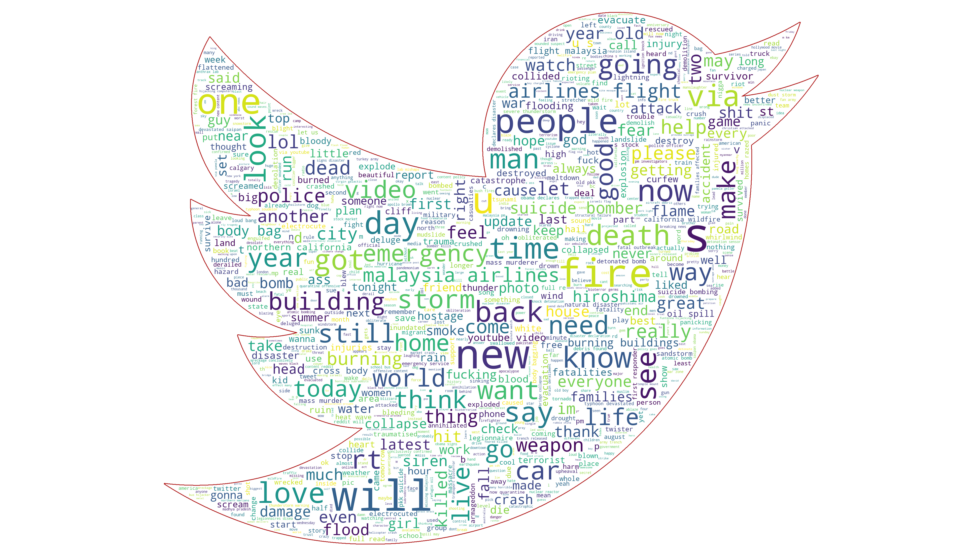

In [20]:
stopwords = set(STOPWORDS)

# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_twitter_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(" ".join(tweet for tweet in df.text))

# # store to file
# wc.to_file("tweet.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Advantages of Word Clouds : 

    Analyzing customer and employee feedback.
    Identifying new SEO keywords to target.

Drawbacks of Word Clouds : 

    Word Clouds are not perfect for every situation.
    Data should be optimized for context.